In [1]:
import os
import pickle
from variational.exponential_family import GenericNormalDistribution, NormalDistribution
from experiments.logisticRegression.utils import get_tgt_log_density, get_dataset
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
import numpy as np

flipped_predictors = get_dataset()
N, dim = flipped_predictors.shape

# Gaussian Prior
my_prior_covariance = 25 * jnp.identity(dim)
my_prior_covariance = my_prior_covariance.at[0, 0].set(400)
my_prior_log_density = NormalDistribution(jnp.zeros(dim), my_prior_covariance).log_density
tgt_log_density = jax.vmap(get_tgt_log_density(flipped_predictors, my_prior_log_density))

PKLs = []
PKL_titles = []
for file in os.listdir("./"):
    if file.endswith(".pkl"):
        PKLs.append(pickle.load(open(file, "rb")))
        PKL_titles.append(str(file))

full_gaussian = GenericNormalDistribution(dimension=9)


In [2]:
lossesPKLs = []
lossesPKL_titles = []
for file in os.listdir("./losses/"):
    if file.endswith(".pkl"):
        lossesPKLs.append(pickle.load(open("./losses/"+file, "rb")))
        lossesPKL_titles.append(str(file))

In [18]:
plt.plot(lossesPKLs[0][1:])
plt.title(lossesPKL_titles[0])
np.savetxt('loss_1e4_10.csv', lossesPKLs[0])

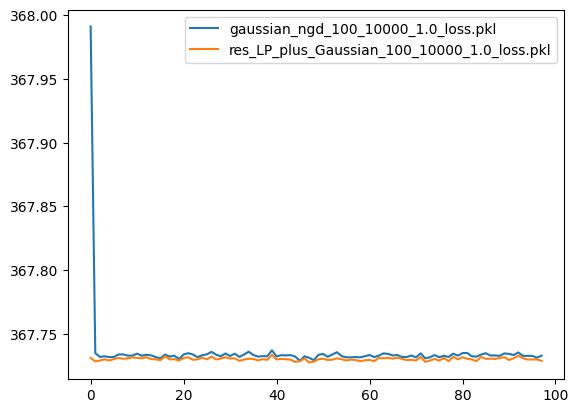

In [20]:
plt.plot(lossesPKLs[0][3:], label=lossesPKL_titles[0])
plt.plot(lossesPKLs[1][3:], label=lossesPKL_titles[1])
plt.legend()

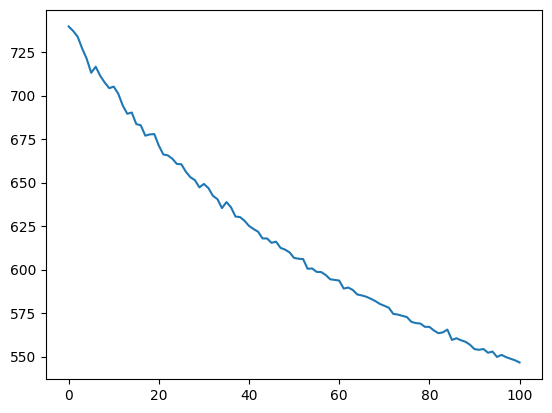

In [28]:
plt.plot(lossesPKLs[0])
np.savetxt('loss_ngd_1e4_100.csv', np.array([np.arange(1, 100+1), lossesPKLs[0].mean(axis=0)[1:], lossesPKLs[0].std(axis=0)]).T, delimiter=",", header="t,mean,std")

In [21]:
full_gaussian.get_mean_cov(PKLs[5]['res'][-1][:-1])

(Array([-0.7791345 ,  0.6244009 ,  1.7090555 , -0.25868183,  0.02785721,
        -0.02275999,  1.0593144 ,  0.5099042 ,  0.41014957], dtype=float32),
 Array([[ 7.5461581e-02, -4.2673019e-03, -9.5452853e-03, -2.6221632e-03,
         -7.7881187e-04,  1.6841422e-04, -9.7413529e-03, -2.0960437e-05,
         -3.7096336e-03],
        [-4.2673033e-03,  3.0104113e-01, -1.1615549e-03, -1.4099110e-02,
          5.3570862e-03,  1.3383747e-02,  3.8421792e-03,  1.0294262e-02,
         -1.2200824e-01],
        [-9.5452908e-03, -1.1614764e-03,  3.0547079e-01, -1.6189300e-02,
          2.6048014e-02, -7.3956326e-02, -3.1349603e-02, -7.4784691e-03,
         -4.6337523e-02],
        [-2.6221732e-03, -1.4099144e-02, -1.6189286e-02,  2.9237756e-01,
         -3.4848634e-02,  1.9307858e-03, -4.1622993e-02,  3.1568157e-03,
         -4.7321778e-02],
        [-7.7882712e-04,  5.3571435e-03,  2.6048066e-02, -3.4848709e-02,
          3.0876347e-01, -9.8065175e-02, -7.4941926e-02, -2.4038307e-02,
          2.7284

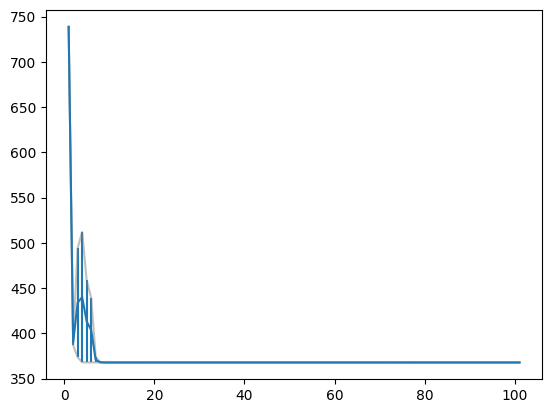

In [35]:
plt.errorbar(range(1,  lossesPKLs[0].shape[1]+1), lossesPKLs[0].mean(axis=0), yerr=lossesPKLs[0].std(axis=0))
plt.plot(range(1, lossesPKLs[0].shape[1]+1), lossesPKLs[0].T, color="gray", alpha=0.5)

In [13]:
lossesPKLs[0].mean(axis=0)

Array([370.10574, 368.8798 , 368.3342 , 368.09042, 367.98553, 367.95312,
       367.953  , 367.95404, 367.953  , 367.95404], dtype=float32)

In [6]:
lossesPKLs[1].shape

(100, 101)

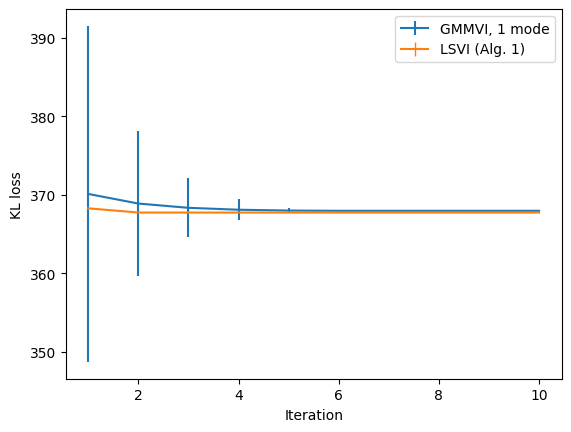

In [37]:
plt.errorbar(x=range(1, 11), y=lossesPKLs[0].mean(axis=0)[:10], yerr=lossesPKLs[0].std(axis=0)[:10], label="GMMVI, 1 mode")
plt.errorbar(x=range(1, 11), y=lossesPKLs[1].mean(axis=0)[1:11], yerr=lossesPKLs[1].std(axis=0)[1:11], elinewidth=1, label="LSVI (Alg. 1)")
plt.legend()
plt.xlabel("Iteration")
plt.ylabel("KL loss")
plt.savefig("gmmvi_pima.pdf")


In [84]:
means, covs = jnp.vectorize(full_gaussian.get_mean_cov, signature="(m)->(n),(n,n)")(PKLs[1]['res'][..., :-1])
means2, covs2 = jnp.vectorize(full_gaussian.get_mean_cov, signature="(m)->(n),(n,n)")(PKLs[0]['res'][..., :-1])

In [4]:
lossesPKL_titles

['xp2_loss.pkl',
 'res_advi_100_loss.pkl',
 'gaussian_10_10000_1.0_loss.pkl',
 'gaussian_ngd_100_10000_1.0_111_loss.pkl',
 'heuristic_gaussian_Nicolas_100_100000_inf_inv_1_[0 1]_loss.pkl',
 'heuristic_gaussian_Nicolas_100_100000_inf_inv_2_[0 0]_loss.pkl',
 'heuristic_gaussian_Nicolas_100_100000_10_1_2_[0 0]_loss.pkl',
 'gaussian_ngd_100_10000_Seq_inv_loss.pkl',
 'heuristic_gaussian_Nicolas_100_100000_10_1_1_[0 1]_loss.pkl']

In [3]:
infinv = np.concat([lossesPKLs[4], lossesPKLs[5]])
p10_1 = np.concat([lossesPKLs[6], lossesPKLs[-1]])
gauss = lossesPKLs[2]
ngd1 = lossesPKLs[3]
ngd = lossesPKLs[-2]
advi = lossesPKLs[1]
gmmvi = lossesPKLs[0]


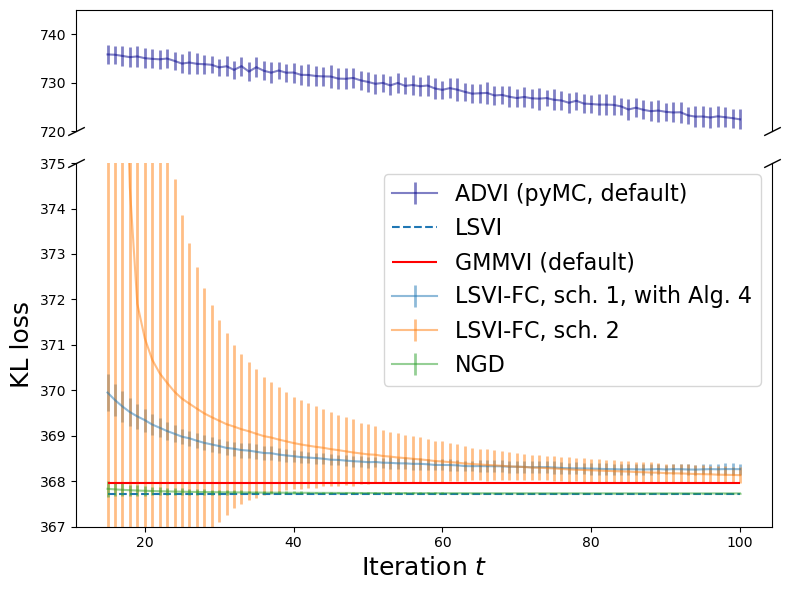

In [17]:
import matplotlib.pyplot as plt
import numpy as np

start = 15
end = 101
legends = ["LSVI-FC, sch. 1, with Alg. 4", "LSVI-FC, sch. 2", "LSVI", "NGD", "ADVI (pyMC, default)", "GMMVI (default)"] 

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
# Plot ADVI on top axis
advi_line = ax1.errorbar(np.arange(start, end), advi.mean(axis=0)[start-1:end], advi.std(axis=0)[start-1:end], label=legends[4], elinewidth=2, alpha=0.5, color="darkblue")
ax1.set_ylim(720, 745)
ax1.spines['bottom'].set_visible(False)
ax1.tick_params(labelbottom=False, bottom=False)  # Hide bottom ticks

# Plot other curves on bottom axis
line1 = ax2.errorbar(np.arange(start, end), p10_1.mean(axis=0)[start:end], p10_1.std(axis=0)[start:end], alpha=0.5, elinewidth=2, label=legends[0])
line2 = ax2.errorbar(np.arange(start, end), infinv.mean(axis=0)[start:end], infinv.std(axis=0)[start:end], alpha=0.5, elinewidth=2, label=legends[1])
line3 = ax2.hlines(y=gauss.mean(axis=0)[-1], xmin=start, xmax=end-1, label=legends[2], linestyle="--")
line4 = ax2.errorbar(np.arange(start, end), ngd.mean(axis=0)[start:end], ngd.std(axis=0)[start:end], alpha=0.5, elinewidth=2, label=legends[3])
line5 = ax2.hlines(y=gmmvi.mean(axis=0)[-1], xmin=start,  xmax=end-1, label=legends[-1], linestyle="---", color="red")

ax2.set_ylim(367, 375)
ax2.set_xlabel(r"Iteration $t$",fontsize=18)
ax2.set_ylabel("KL loss",fontsize=18)
ax2.tick_params(top=False)  # Hide top ticks


# Combine legends from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles1 + handles2
all_labels = labels1 + labels2
ax2.legend(all_handles, all_labels, loc="upper right",prop={'size': 16})

# Axis break decoration
ax2.spines['top'].set_visible(False)
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.tight_layout()
plt.savefig("PIMA.pdf", dpi=300)


/tmp/ipykernel_643714/1095639691.py:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


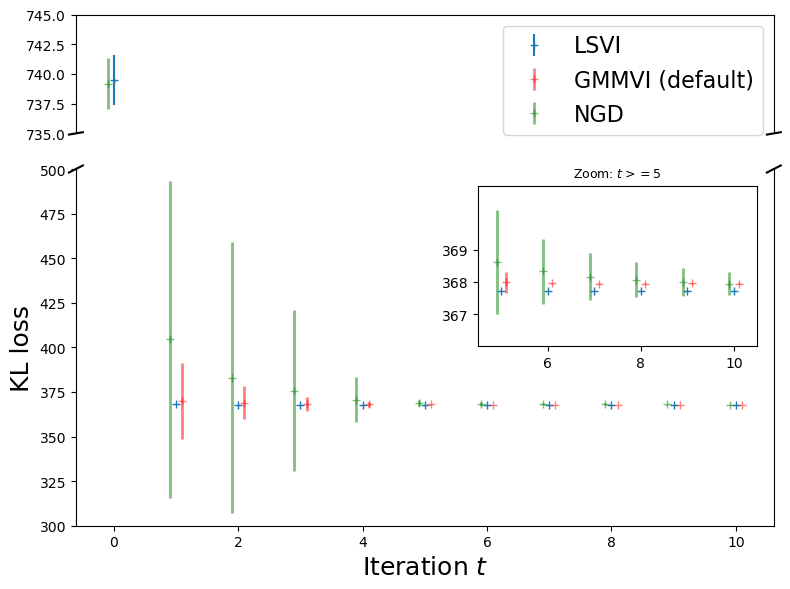

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Example data
x = np.arange(0, 11)
y = gauss.mean(axis=0)
ystd = gauss.std(axis=0)

xgmmvi = np.arange(1, 11)
ygmmvi = gmmvi.mean(axis=0)
ygmmvistd = gmmvi.std(axis=0)

xngd = np.arange(0, 11)
yngd = ngd.mean(axis=0)[:11]
yngdstd = ngd.std(axis=0)[:11]

xgmmvi_shifted = xgmmvi + 0.1  # slight shift to the right
xngd_shifted = xngd - 0.1      # slight shift to the left


# Create broken axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6), gridspec_kw={'height_ratios': [1, 3]})
legends = ["LSVI", "GMMVI (default)", "NGD"]

# Main plots
ax1.errorbar(x=x, y=y, yerr=ystd, fmt='+', label=legends[0])
ax2.errorbar(x=x, y=y, yerr=ystd, fmt='+')
#ax1.errorbar(x=xgmmvi, y=ygmmvi, yerr=ygmmvistd, fmt='+', label=legends[1], alpha=0.5, elinewidth=0.5, color="darkblue")
#x2.errorbar(xgmmvi, ygmmvi, yerr=ygmmvistd, fmt='+', alpha=0.5, elinewidth=0.5, color="darkblue")
#ax1.errorbar(x=xngd, y=yngd, yerr=yngdstd, fmt='+', label=legends[2], alpha=0.5, elinewidth=0.75, color="green")
#ax2.errorbar(xngd, yngd, yerr=yngdstd, fmt='+', alpha=0.5, elinewidth=0.75, color="green")

ax1.errorbar(x=xgmmvi_shifted, y=ygmmvi, yerr=ygmmvistd, fmt='+', label=legends[1], alpha=0.5, elinewidth=2, color="red")
ax2.errorbar(x=xgmmvi_shifted, y=ygmmvi, yerr=ygmmvistd, fmt='+', alpha=0.5, elinewidth=2, color="red")

ax1.errorbar(x=xngd_shifted, y=yngd, yerr=yngdstd, fmt='+', label=legends[2], alpha=0.5, elinewidth=2, color="green")
ax2.errorbar(x=xngd_shifted, y=yngd, yerr=yngdstd, fmt='+', alpha=0.5, elinewidth=2, color="green")


# Y-axis limits
ax1.set_ylim(735, 745)
ax2.set_ylim(300, 500)

# Broken axis spines and diagonals
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

d = .01
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)
kwargs.update(transform=ax2.transAxes)
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)

# Axis labels and ticks
ax1.tick_params(labelbottom=False, bottom=False)
ax2.tick_params(top=False)
ax2.set_xlabel(r'Iteration $t$', fontsize=18)
ax2.set_ylabel('KL loss', fontsize=18)

# Add zoomed-in inset to ax2 (bottom plot), top-right
axins = inset_axes(ax2, width="40%", height="45%", loc='upper right', borderpad=1.2)
zoom_mask = x >= 5
axins.errorbar(x[zoom_mask], y[zoom_mask], yerr=ystd[zoom_mask], fmt='+', color='C0')
#axins.errorbar(xgmmvi[zoom_mask[1:]], ygmmvi[zoom_mask[1:]], yerr=ygmmvistd[zoom_mask[1:]], fmt='+', color='darkblue', alpha=0.5, elinewidth=0.5)
#axins.errorbar(xngd[zoom_mask], yngd[zoom_mask], yerr=yngdstd[zoom_mask], fmt='+', color='green', alpha=0.5, elinewidth=0.75)

axins.errorbar(xgmmvi_shifted[zoom_mask[1:]], ygmmvi[zoom_mask[1:]], yerr=ygmmvistd[zoom_mask[1:]], fmt='+', color='red', alpha=0.5, elinewidth=2)
axins.errorbar(xngd_shifted[zoom_mask], yngd[zoom_mask], yerr=yngdstd[zoom_mask], fmt='+', color='green', alpha=0.5, elinewidth=2)

axins.set_xlim(4.5, 10.5)
axins.set_ylim(366, 371)
axins.set_xticks([6, 8, 10])
axins.set_yticks([367, 368, 369])  # Optional: remove y-ticks for clarity
axins.set_title("Zoom: $t >= 5$", fontsize=9)
# Legend and layout
ax1.legend(loc='upper right',prop={'size': 16})
plt.tight_layout()
plt.savefig("PIMA2.pdf", dpi=300)
